In [1]:
import pandas as pd
df = pd.read_csv("c:/data/school/data.csv")
df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

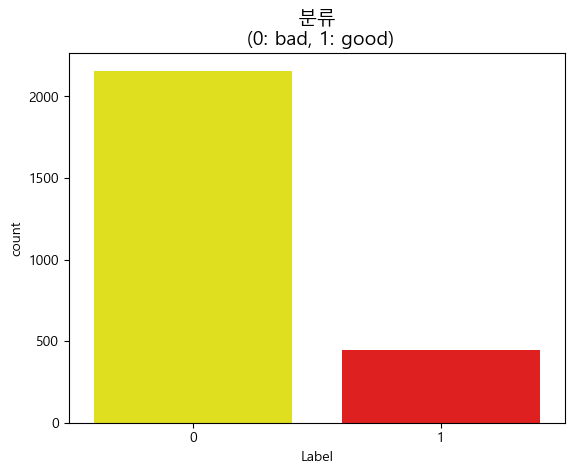

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Label', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)
#불균형 데이터셋

In [3]:
train_cols = df.columns[0:8]
X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수

array([[<AxesSubplot:xlabel='teaching', ylabel='teaching'>,
        <AxesSubplot:xlabel='international', ylabel='teaching'>,
        <AxesSubplot:xlabel='research', ylabel='teaching'>,
        <AxesSubplot:xlabel='citations', ylabel='teaching'>,
        <AxesSubplot:xlabel='income', ylabel='teaching'>,
        <AxesSubplot:xlabel='num_students', ylabel='teaching'>,
        <AxesSubplot:xlabel='student_staff_ratio', ylabel='teaching'>,
        <AxesSubplot:xlabel='international_students', ylabel='teaching'>,
        <AxesSubplot:xlabel='total_score', ylabel='teaching'>,
        <AxesSubplot:xlabel='Label', ylabel='teaching'>],
       [<AxesSubplot:xlabel='teaching', ylabel='international'>,
        <AxesSubplot:xlabel='international', ylabel='international'>,
        <AxesSubplot:xlabel='research', ylabel='international'>,
        <AxesSubplot:xlabel='citations', ylabel='international'>,
        <AxesSubplot:xlabel='income', ylabel='international'>,
        <AxesSubplot:xlabel='num_stud

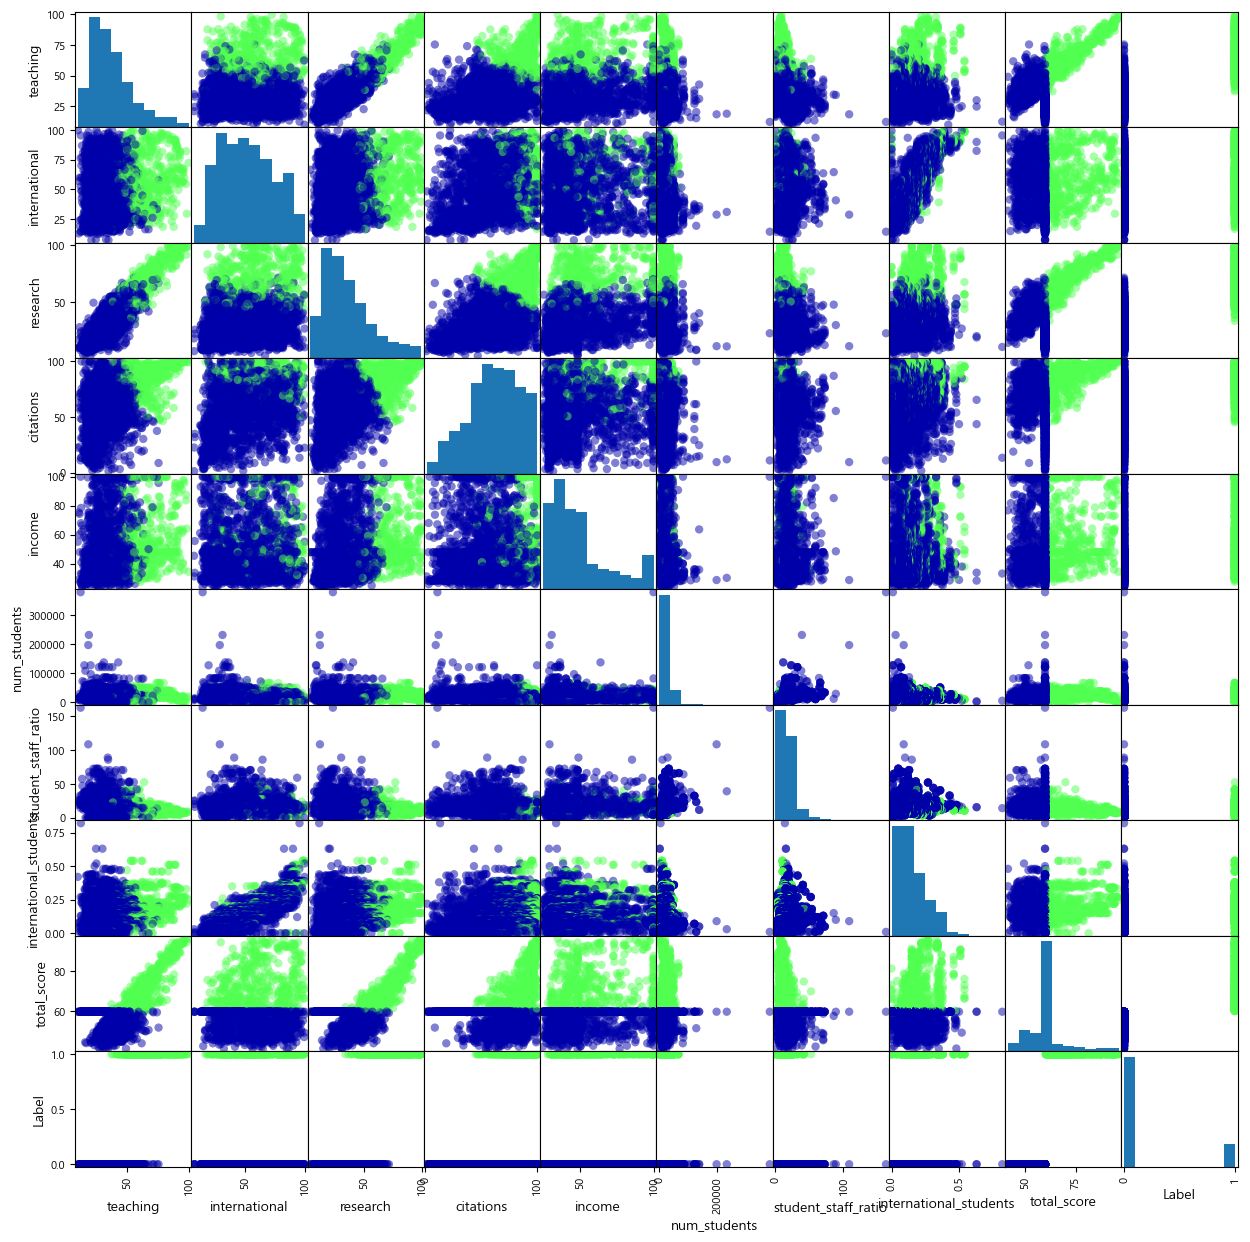

In [4]:
import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Label"].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [6]:
X = df_samp[train_cols] # 독립변수
y = df_samp["Label"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [8]:
from keras import Sequential
from keras.layers import Dense
class MyModel(Sequential):
    def __init__(self, input_nodes,hidden_layers,num_classes):
        #초기화함수
        super(MyModel, self).__init__(name='my_model')
        #상위클래스                          모형이름
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0], input_shape=(input_nodes,), activation='relu'))
        self.add(Dense(hidden_layers[1], activation='relu'))
        self.add(Dense(hidden_layers[2], activation='relu'))
        self.add(Dense(num_classes, activation='sigmoid'))

In [9]:
model = MyModel(len(X_train.columns), [128,64,32],1)

In [10]:
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


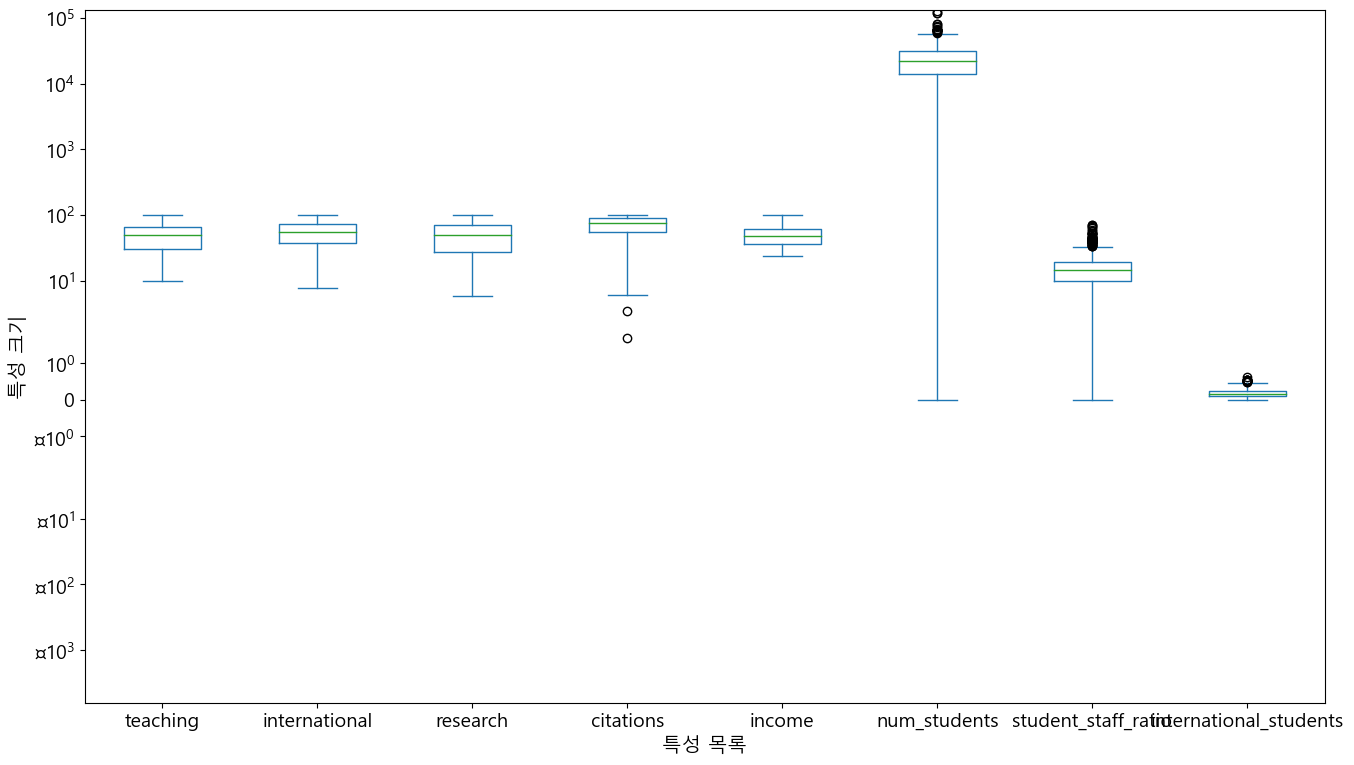

In [11]:
plt.rcParams["figure.figsize"]=(16,9)
plt.rcParams["font.size"]=14
df_samp[train_cols].plot.box()
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

In [12]:
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_tr = X_train.min(axis=0)
# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_tr = (X_train - min_on_tr).max(axis=0)

# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_tr) / range_on_tr
print("특성별 최소값 \n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값 \n{0}".format(X_train_scaled.max(axis=0)))
# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_tr) / range_on_tr

특성별 최소값 
teaching                  0.0
international             0.0
research                  0.0
citations                 0.0
income                    0.0
num_students              0.0
student_staff_ratio       0.0
international_students    0.0
dtype: float64
특성별 최대값 
teaching                  1.0
international             1.0
research                  1.0
citations                 1.0
income                    1.0
num_students              1.0
student_staff_ratio       1.0
international_students    1.0
dtype: float64


In [17]:
# 5. 모델 학습
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[es])

Epoch 1/50
18/18 [==============================] - 0s 17ms/step - loss: 0.0074 - accuracy: 0.9895 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.9912 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0062 - accuracy: 0.9912 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/50
18/18 [==============================] - 0s 11ms/step - loss: 0.0058 - accuracy: 0.9965 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.9859 - val_loss: 0.0099 - val_accuracy: 0.9860
Epoch 6/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0207 - accuracy: 0.9701 - val_loss: 0.0047 - val_accuracy: 0.9930
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.9877 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 8/50
18/18 

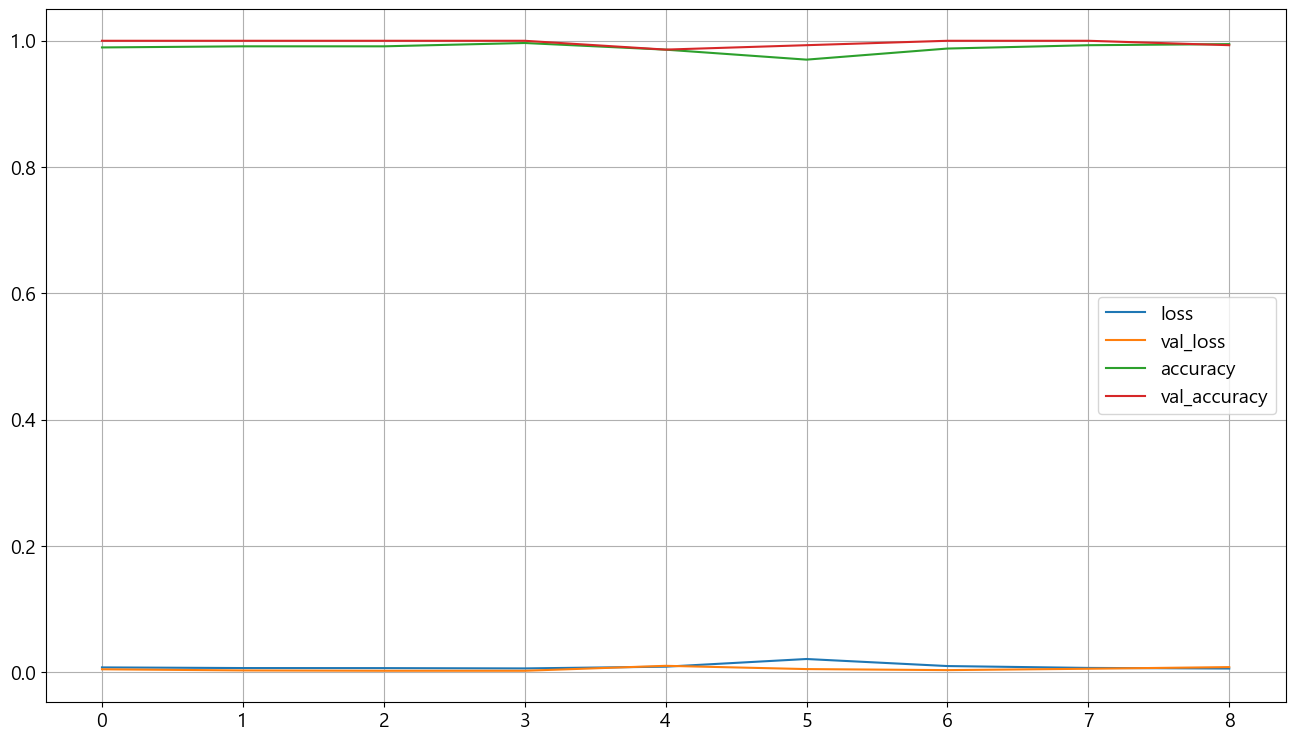

In [18]:
# 6. 모델 학습 과정 표시
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [19]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#학습용

23/23 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 0.9958
[0.006036076694726944, 0.9957864880561829]
accuracy: 99.58%


In [20]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용

6/6 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9888
[0.009525834582746029, 0.9887640476226807]
accuracy: 98.88%
